<a href="https://colab.research.google.com/github/packtpublishing/Machine-Learning-for-Imbalanced-Data/blob/main/chapter07/mixup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Files already downloaded and verified


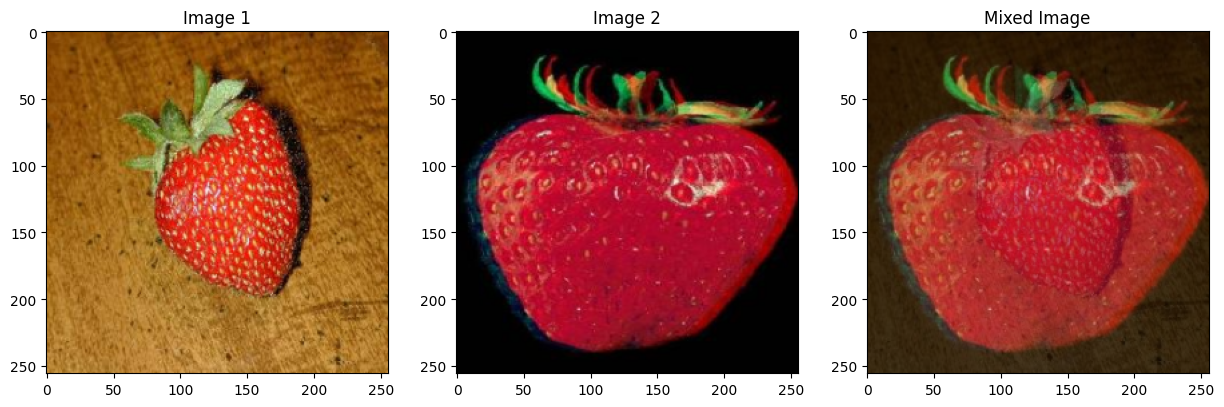

In [59]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

np.random.seed(3089084040)


# Define the mixup function
def mixup_images(image1, image2, alpha=0.35):
    """
    Perform mixup augmentation on two images.

    Parameters:
    - image1, image2 (torch.Tensor): Input images in the form of PyTorch tensors.
                                     Expected shape: [channels, height, width]
    - alpha (float): Mixup interpolation coefficient.

    Returns:
    - torch.Tensor: Mixed image tensor.
    """
    # Generate mixup coefficient
    lam = np.random.beta(alpha, alpha)

    # Mix images
    mixed_image = lam * image1 + (1 - lam) * image2
    return mixed_image


# Root directory for the dataset
CALTECH_ROOT = "./data"

# Create a transform to convert the image to tensor
# transform = transforms.Compose([transforms.ToTensor()])
transform = transforms.Compose([transforms.Resize((256, 256)), transforms.ToTensor()])

# Load images from the Caltech101 dataset
caltech101 = torchvision.datasets.Caltech101(
    root=CALTECH_ROOT, download=True, transform=transform
)
image1, _ = caltech101[7823]  # Get the first image
image2, _ = caltech101[7829]  # Get the second image

# Apply mixup
mixed_image = mixup_images(image1, image2)

# Display the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(np.transpose(image1.numpy(), (1, 2, 0)))
plt.title("Image 1")

plt.subplot(1, 3, 2)
plt.imshow(np.transpose(image2.numpy(), (1, 2, 0)))
plt.title("Image 2")

plt.subplot(1, 3, 3)
plt.imshow(np.transpose(mixed_image.numpy(), (1, 2, 0)))
plt.title("Mixed Image")

plt.show()